In [13]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import sys
import datetime
import re

import warnings; warnings.filterwarnings('ignore')

from src.data.process_data import process_data

sys.path.append('..')
from config import CFG
CFG = CFG()

In [193]:
date = datetime.datetime.now()
date = (date - datetime.timedelta(days=7)).strftime('%Y-%m-%d')
current_dir = os.path.abspath(os.path.dirname(os.getcwd()))
data_dir = os.path.join(current_dir, "data_files")
raw_data = os.path.join(data_dir, "raw")

CFG.RAW_DATA_PATH = raw_data
CFG.DATE = date
CFG.SAVE = False

In [194]:
df = process_data(CFG)
df.head(3)

,visit date,city,site,expected drug,category,colour,texture,fentanyl strip,benzo strip,ftir component 0,ftir component 1,ftir component 2,ftir component 3,ftir component 4,ftir component 5
0,2023-01-31,Penticton,Fairhaven,Down (Unknown Opioid),Opioid,Purple,Chunk,1,-1,Fentanyl,Erythritol,Caffeine,None,None,None
1,2023-01-31,Vancouver,Get Your Drugs Tested,Unknown,Unknown,Brown (light),Chunk,1,-1,Uncertain match,Fentanyl,None,None,None,None
2,2023-01-31,Vancouver,Get Your Drugs Tested,Alprazolam,Depressant,Green (light),Chunk,-1,1,Flualprazolam,Microcrystalline cellulose,None,None,None,None


In [4]:
print(df['category'].unique())

['Opioid' 'Unknown' 'Depressant' 'Stimulant' 'Psychedelic' 'Other'
 'Polysubstance']


In [4]:
df.nunique()

visit date          1363
city                  35
site                 110
expected drug        382
category               7
colour                32
texture               15
fentanyl strip         3
benzo strip            3
ftir component 0     386
ftir component 1     312
ftir component 2     195
ftir component 3     123
ftir component 4      62
ftir component 5      35
dtype: int64

In [438]:
site_count = df.value_counts('site').head(10)
city_counts = df.value_counts('city').head(10)

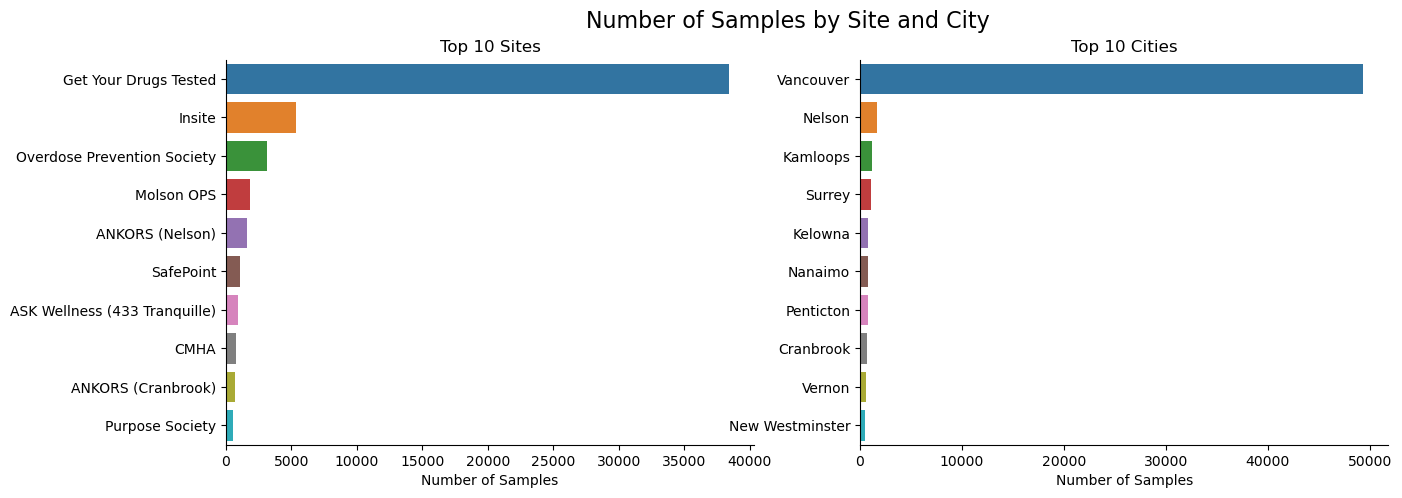

In [458]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=site_count.values, y=site_count.index, ax=ax[0])
sns.barplot(x=city_counts.values, y=city_counts.index, ax=ax[1])
sns.despine()
ax[0].set_ylabel('')
ax[0].set_xlabel('Number of Samples')
ax[0].set_title('Top 10 Sites')

ax[1].set_ylabel('')
ax[1].set_xlabel('Number of Samples')
ax[1].set_title('Top 10 Cities')

plt.suptitle('Number of Samples by Site and City', fontsize=16)
plt.show()

- The highest number of samples in each category is much more popular than all others

In [116]:
df = df.replace({None: np.nan}, regex=False)
df

,visit date,city,site,expected drug,category,colour,texture,fentanyl strip,benzo strip,ftir component 0,ftir component 1,ftir component 2,ftir component 3,ftir component 4,ftir component 5
0,2023-01-31,Penticton,Fairhaven,Down (Unknown Opioid),Opioid,Purple,Chunk,1,-1,Fentanyl,Erythritol,Caffeine,NaN,NaN,NaN
1,2023-01-31,Vancouver,Get Your Drugs Tested,Unknown,Unknown,Brown (light),Chunk,1,-1,Uncertain match,Fentanyl,NaN,NaN,NaN,NaN
2,2023-01-31,Vancouver,Get Your Drugs Tested,Alprazolam,Depressant,Green (light),Chunk,-1,1,Flualprazolam,Microcrystalline cellulose,NaN,NaN,NaN,NaN
3,2023-01-31,Nanaimo,CMHA,Down (Unknown Opioid),Opioid,Pink,Powder,1,1,Fentanyl,Mannitol,Caffeine,Bromazolam,NaN,NaN
4,2023-01-31,Cranbrook,ANKORS (Cranbrook),Methamphetamine,Stimulant,Colourless,Crystal,-1,0,Methamphetamine,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2018-12-03,Vancouver,Insite,MDMA,Psychedelic,Black,Granules,0,0,Uncertain match,Phenacetin,NaN,NaN,NaN,NaN
59996,2018-12-03,Vancouver,Insite,Fentanyl,Opioid,Purple,Granules,1,0,Caffeine,Inositol,Heroin hcl,Fentanyl,NaN,NaN
59997,2018-12-03,Vancouver,Getaway,Unknown,Unknown,Colourless,Crystal,-1,0,Methamphetamine,NaN,NaN,NaN,NaN,NaN
59998,2018-12-03,Vancouver,Getaway,Fentanyl,Opioid,Green,Pebble,1,0,Fentanyl,Caffeine,Mannitol,Mannitol,Caffeine,Fentanyl


In [63]:
opioid = df[(df['category'] == 'Opioid') | (df['expected drug'].isin([
    'Fentanyl and Methamphetamine', 'Down and Methamphetamine', 'Heroin and Methamphetamine', 'Heroin and Cocaine'
])) ].index
df['expected opioid'] = df.index.isin(opioid).astype(int)
df

,visit date,city,site,expected drug,category,colour,texture,fentanyl strip,benzo strip,ftir component 0,ftir component 1,ftir component 2,ftir component 3,ftir component 4,ftir component 5,contains opioid,expected opioid
0,2023-01-31,Penticton,Fairhaven,Down (Unknown Opioid),Opioid,Purple,Chunk,1,-1,Fentanyl,Erythritol,Caffeine,NaN,NaN,NaN,1,1
1,2023-01-31,Vancouver,Get Your Drugs Tested,Unknown,Unknown,Brown (light),Chunk,1,-1,Uncertain match,Fentanyl,NaN,NaN,NaN,NaN,0,0
2,2023-01-31,Vancouver,Get Your Drugs Tested,Alprazolam,Depressant,Green (light),Chunk,-1,1,Flualprazolam,Microcrystalline cellulose,NaN,NaN,NaN,NaN,0,0
3,2023-01-31,Nanaimo,CMHA,Down (Unknown Opioid),Opioid,Pink,Powder,1,1,Fentanyl,Mannitol,Caffeine,Bromazolam,NaN,NaN,1,1
4,2023-01-31,Cranbrook,ANKORS (Cranbrook),Methamphetamine,Stimulant,Colourless,Crystal,-1,0,Methamphetamine,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2018-12-03,Vancouver,Insite,MDMA,Psychedelic,Black,Granules,0,0,Uncertain match,Phenacetin,NaN,NaN,NaN,NaN,0,0
59996,2018-12-03,Vancouver,Insite,Fentanyl,Opioid,Purple,Granules,1,0,Caffeine,Inositol,Heroin hcl,Fentanyl,NaN,NaN,1,1
59997,2018-12-03,Vancouver,Getaway,Unknown,Unknown,Colourless,Crystal,-1,0,Methamphetamine,NaN,NaN,NaN,NaN,NaN,0,0
59998,2018-12-03,Vancouver,Getaway,Fentanyl,Opioid,Green,Pebble,1,0,Fentanyl,Caffeine,Mannitol,Mannitol,Caffeine,Fentanyl,1,1


# Matching FTIR and Fentanyl Strip
- Now lets investigate if the results from the FTIR and fentanyl strip match

In [202]:
def opioid_present(col):
    """
    This function uses a list of regex strings to find if any opioids are present in a given column (ftir components).
    """
    opioid_list = ['(despropionyl\s)?(para-fluoro)?(carf|f)entan(i|y)l( base)?', 
                   'heroin.*', 
                   '(hydro|oxy).*one', 
                   'opium', 
                   'w-1(8|9)', 
                   '6-mam', 
                   '.*tazene', 
                   '(code|morph)ine',
                   '(furanyl\s)?uf-17']
    if col is None:
        return 0
    for item in opioid_list:
        return 1 if re.search(item, col, re.IGNORECASE) else 0

In [210]:
ftirs = [x for x in df.columns.tolist() if x.startswith('ftir')]
for col in ftirs:
    df[col] = df[col].astype(str)

In [228]:
opioids = df.loc[:, [f'ftir component {i}' for i in range(6)]].applymap(lambda x: opioid_present(x))
opioids = opioids.apply(sum, axis=1).astype(bool).astype(int)
df['contains_opioids'] = opioids

In [247]:
incorrect_strip = df[(df['contains_opioids'] == 1) & (df['fentanyl strip'] == -1)]
incorrect_ftir = df[(df['contains_opioids'] == -1) & (df['fentanyl strip'] == 1)]
len(incorrect_strip), len(incorrect_ftir)

(31, 0)

- this is very surprising!
- the strips use something called an immunoassay, which uses antibodies to detect the fentanyl.
- antibodies are extremely specific and sensitive, more so than the FTIR spec
- lets look a little closer

In [249]:
incorrect_strip.loc[:, [f'ftir component {i}' for i in range(6)]]

,ftir component 0,ftir component 1,ftir component 2,ftir component 3,ftir component 4,ftir component 5
2086,Erythritol,Fentanyl,None,None,None,None
2463,Caffeine,Fentanyl,Erythritol,None,None,None
6794,Caffeine,Fentanyl,None,None,None,None
7934,Caffeine,Erythritol,Fentanyl,None,None,None
17815,Mannitol,Fentanyl,Caffeine,None,None,None
22214,Fentanyl,Uncertain match,None,None,None,None
27122,Fentanyl,None,None,None,None,None
33625,Caffeine,Fentanyl,Uncertain carbohydrate,None,None,None
38128,Propionanilide,Uncertain match,Fentanyl,None,None,None
47286,Caffeine,Mannitol,Fentanyl,None,None,None


- They are all the generic fentanyl, not even the more potent carfent.
- Possibly human error, lets see how spread out the sites are

In [254]:
ratio = len(df) / len(incorrect_strip)

In [260]:
test = incorrect_strip['site'].value_counts()
test

Insite                           13
Get Your Drugs Tested            10
Molson OPS                        3
ASK Wellness (433 Tranquille)     2
POUNDS                            1
Outreach Urban Health             1
Abbotsford Hub                    1
Name: site, dtype: int64

In [263]:
baseline = df['site'].value_counts() / ratio
baseline = baseline[baseline.index.isin(test.index)]
baseline


Get Your Drugs Tested           19.85
Insite                           2.75
Molson OPS                       0.93
ASK Wellness (433 Tranquille)    0.48
POUNDS                           0.17
Outreach Urban Health            0.12
Abbotsford Hub                   0.05
Name: site, dtype: float64

In [265]:
test / baseline

ASK Wellness (433 Tranquille)    4.19
Abbotsford Hub                  18.43
Get Your Drugs Tested            0.50
Insite                           4.72
Molson OPS                       3.22
Outreach Urban Health            8.20
POUNDS                           5.94
Name: site, dtype: float64

- We will only use Insite and Get Your Drugs Tested since the sample size is a bit more significant. 
- So, there is almost 5 times more samples from Insite with incorrect FTIR than there should be, according to the baseline
- We should also take a look at the dates to see if they are spread out or clumped (maybe new employee or batch of strips)

In [373]:
# incorrect_strip.reset_index(inplace=True)
incorrect_strip['per_site_diff'] = incorrect_strip.groupby(['site'])['visit date'].diff(-1)
incorrect_strip['per_site_diff'] = incorrect_strip['per_site_diff'].dt.days

In [432]:
def format_site(row):
    if row['site'] == 'ASK Wellness (433 Tranquille)':
        return ['background-color: #C3ACD0; color: white'] * len(row)
    elif row['site'] == 'Get Your Drugs Tested':
        return ['background-color: #7286D3; color: white'] * len(row)
    elif row['site'] == 'Insite':
        return ['background-color: #645CBB; color: white'] * len(row)
    else:
        return ['background-color: #8EA7E9; color: white'] * len(row)

def format_df(styler):
    styler.set_caption('Days Between Incorrect Strip Results per Site')
    styler.format(formatter={
        'log_per_site_diff': '{:.2f}',
        'per_site_diff': '{:.0f}',
        'visit date': '{:%Y-%m-%d}'
        })
    styler.apply(format_site, axis=1)  #
    styler.background_gradient(cmap='Reds', axis=0, subset=['log_per_site_diff'])
    return styler

In [433]:
# incorrect_strip_df.reset_index(inplace=True)
incorrect_strip_df = incorrect_strip[['visit date', 'site', 'per_site_diff']].dropna()
incorrect_strip_df['log_per_site_diff'] = (incorrect_strip_df['per_site_diff'] + 1).apply(np.log)
incorrect_strip_df.style.pipe(format_df)

,visit date,site,per_site_diff,logged_per_site_diff
0,2023-01-25,ASK Wellness (433 Tranquille),1197,7.09
1,2022-10-26,Get Your Drugs Tested,135,4.91
2,2022-06-13,Get Your Drugs Tested,66,4.20
3,2022-04-08,Get Your Drugs Tested,82,4.42
4,2022-01-16,Get Your Drugs Tested,138,4.93
5,2021-08-31,Get Your Drugs Tested,89,4.50
6,2021-06-03,Get Your Drugs Tested,222,5.41
7,2020-10-24,Get Your Drugs Tested,91,4.52
8,2020-07-25,Get Your Drugs Tested,28,3.37
9,2020-06-27,Get Your Drugs Tested,118,4.78


- It does look like there was human error due to the clumping nature
- Further, there is almost a weekly pattern, which could be when that employee was working and the ceasing of it could be them quitting
- Get Your Drugs Tested results are so spaced out and erratic if it was human error, it is more of a one-off